# Finding the Best Markets to Advertise In

For this project, we will assume we're working for an e-learning company that offers programming courses. We want to promote a product and invest some money into advertisement. The goal is to find out the two best markets to advertise our product.

# Understanding the Data

To reach our goal we will use data from freeCodeCamp's 2017 New Coder Survey. https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(direct_link, low_memory = 0)
print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for Sample Representativity

We want to answer questions about a population of new coder. We want to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coder are willing to spend on learning.

In [2]:
# Frequency distribution table for 'JobRoleInterest'
fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                        11.770595
  Front-End Web Developer                                                                                                                                                                                                                        6.435927
  Data Scientist                                                                                                                                                                                                                                 2.173913
Back-End Web Developer                                                                                                                                                                                                                           2.030892


The highest percentage of people are interested in web development with a smaller percentage interested in subjects like data scientist,game and mobile development, and Information Sercurity.

The focus of our courses is on web and mobile development so our sample is representative of our population of interest.

Many respondants are interested in more than one subject. It will be useful to see how many people are interested in a single subject vs mixed subjects.

In [3]:
# Split each string
interests_no_null = fcc['JobRoleInterest'].dropna()
split_interests = interests_no_null.str.split(',')

# Frequency table for number of options
n_of_options = split_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of the participants have a clear idea of which subject they would like to work in, while the vast majority of students have mixed interests.

Lets find out how many respondants choose at least mobile or web development.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


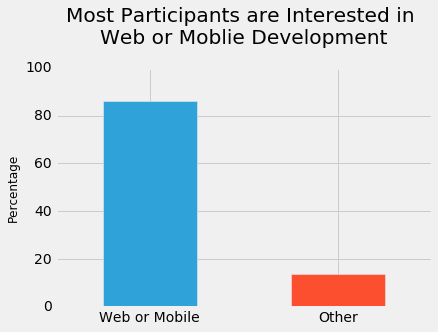

In [4]:
# Frequency Table
web_or_moblie = interests_no_null.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_moblie.value_counts(normalize=True) * 100
print(freq_table)

#Graph for frequency table
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Moblie Development', y=1.08)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['Web or Mobile', 'Other'], rotation=0)
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest.

# New Coders - Location and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

In [6]:
# Isolate the participants that answered what role they'd be interested in
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
freq_abs = fcc_good['CountryLive'].value_counts()
freq_rel = fcc_good['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data={'Absolute frequency': freq_abs,
                   'Percentage': freq_rel})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of our potential customers are located in the US, and seems like the most interesting market. India has the second highest at 7.7% but is not too far off from the UK (4.6%) and Canada (3.8%).

This is a good first step. Now we will figure out how much people are actually willing to spend on learning.

# Spending Money for Learning